## Importing libraries

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data pre processing

In [86]:
data=np.array(
    [
        [0.4,2.6],
        [1.2,1.9],
        [0.4,1.7],
        [2,2.8],
        [2.8,2.3]
    ]
)
X=data[:,0].reshape(1,-1)
Y=data[:,1]

### Print shape

In [87]:
print(X.shape)
print(Y.shape)

(1, 5)
(5,)


### Plot data

In [88]:
def plotCanvas():
    f = plt.figure()
    f.set_figwidth(7)
    f.set_figheight(7)
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.axhline(color='black',linestyle='dashed',lw=2)
    plt.axvline(color='black',linestyle='dashed',lw=2)

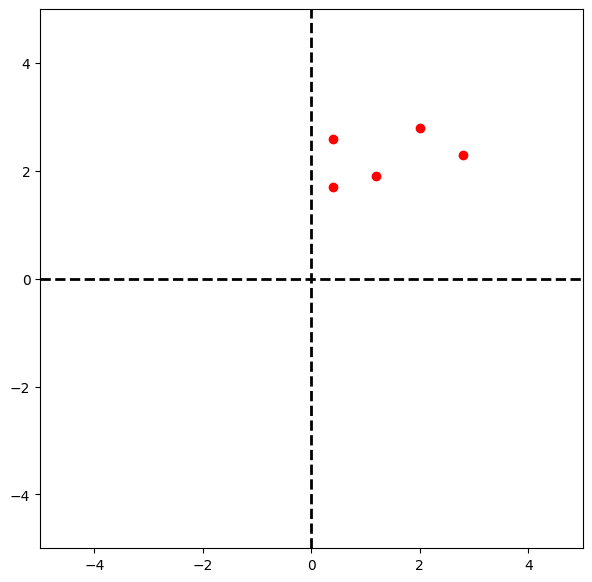

In [89]:
plotCanvas()
plt.plot(X[0,:],Y,'o',c='red')

### Adding features to data

In [90]:
degree=3

In [91]:
original_X=X

In [92]:
""" dummy=np.ones(X.shape[1])
X=np.row_stack((dummy,X)) """

' dummy=np.ones(X.shape[1])\nX=np.row_stack((dummy,X)) '

In [93]:
""" for i in range(2,degree+1):
    X=np.row_stack((X,original_X**i)) """

' for i in range(2,degree+1):\n    X=np.row_stack((X,original_X**i)) '

In [94]:
def appendFeatures(X,degree):
    dummy=np.ones(X.shape[1])
    X=np.row_stack((dummy,X))
    for i in range(2,degree+1):
        X=np.row_stack((X,original_X**i))
    return X

In [95]:
X=appendFeatures(original_X,degree)

### Print data

In [96]:
col=[]
for i in range(degree+1):
    col.append('X^'+str(i))
pd.DataFrame(X.T,columns=col)

,X^0,X^1,X^2,X^3
0,1.0,0.4,0.16,0.064
1,1.0,1.2,1.44,1.728
2,1.0,0.4,0.16,0.064
3,1.0,2.0,4.00,8.000
4,1.0,2.8,7.84,21.952


## Analytical Model

In [97]:
def weights(X,Y):
    return np.linalg.pinv(X@X.T)@X@Y

In [98]:
def predict(X,w):
    return X.T@w

### Generate weights and predict

In [99]:
w=weights(X,Y)

### Plot curve

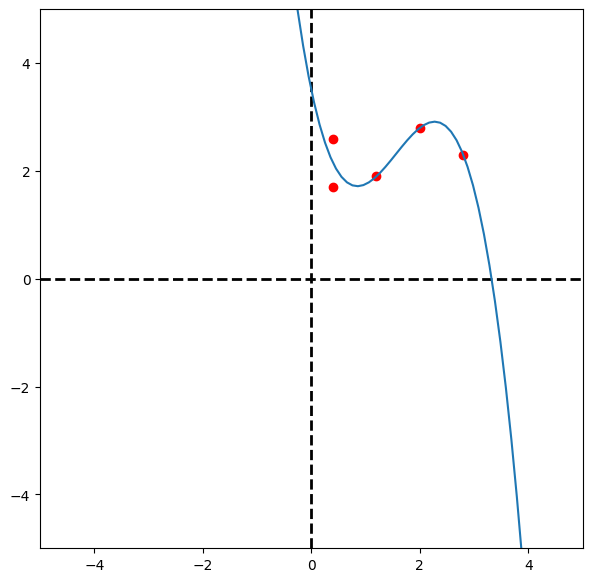

In [100]:
plotCanvas()
s=np.linspace(-5,5,100)
t=w[0]+w[1]*s+w[2]*(s**2)+w[3]*(s**3)
plt.plot(original_X[0,:],Y,'o',c='red')
plt.plot(s,t)

### Loss function

In [101]:
def lossSSD(Y_hat,Y):
    return np.sum((Y_hat-Y)**2)

## Variable degree for poly nomial

In [102]:
degree=[1,2,3,4,5]

### Function for poly regression

In [103]:
def polyRegression(original_X,Y,degree):
    SSD=[]
    for i in degree:
        plotCanvas()
        X=appendFeatures(original_X,i)
        w=weights(X,Y)
        Y_hat=predict(X,w)
        SSD.append(lossSSD(Y,Y_hat))
        s=np.linspace(-5,5,100)
        t=0
        for j in range(len(w)):
            t+=w[j]*(s**j)
        plt.plot(original_X[0,:],Y,'o',c='red')
        plt.plot(s,t)
    return SSD

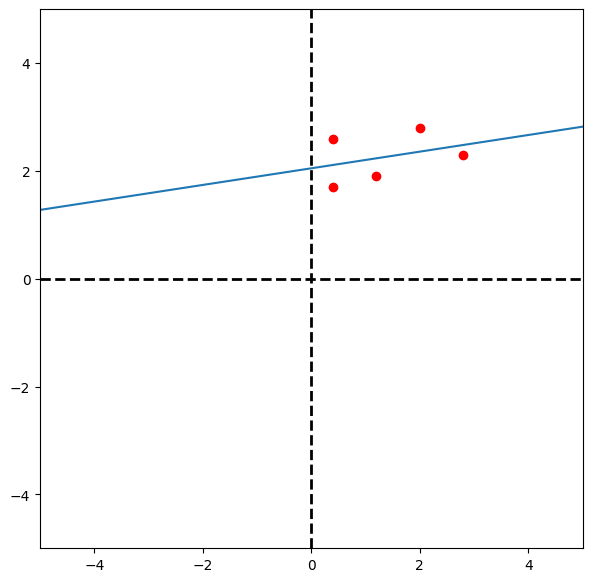

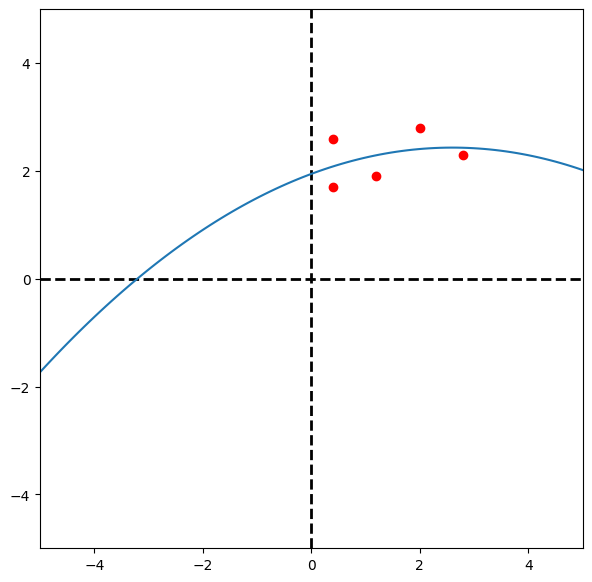

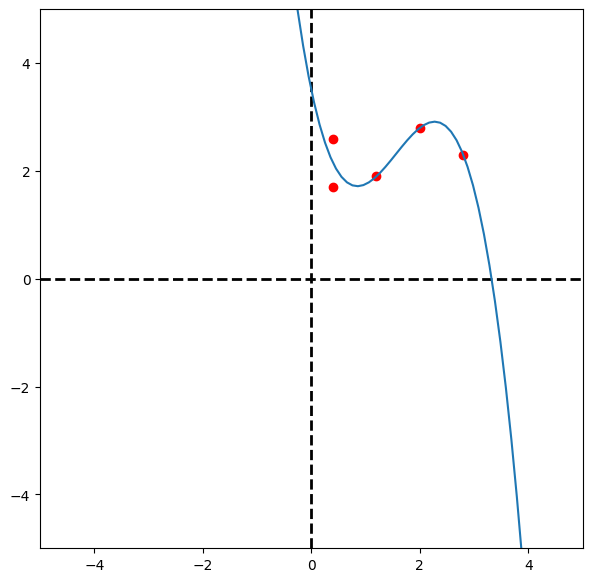

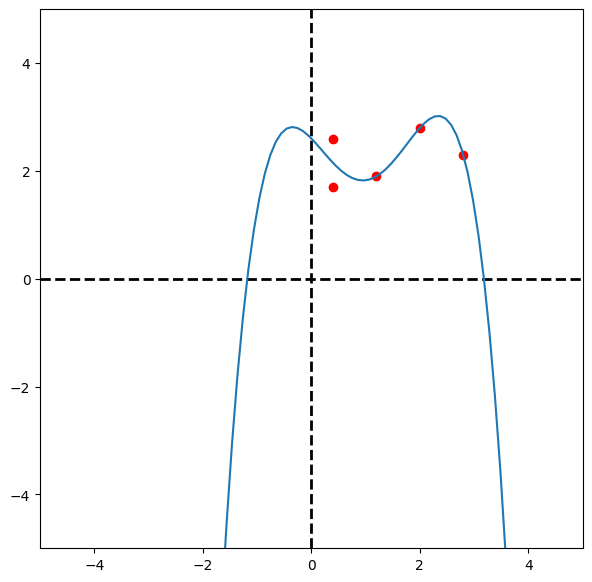

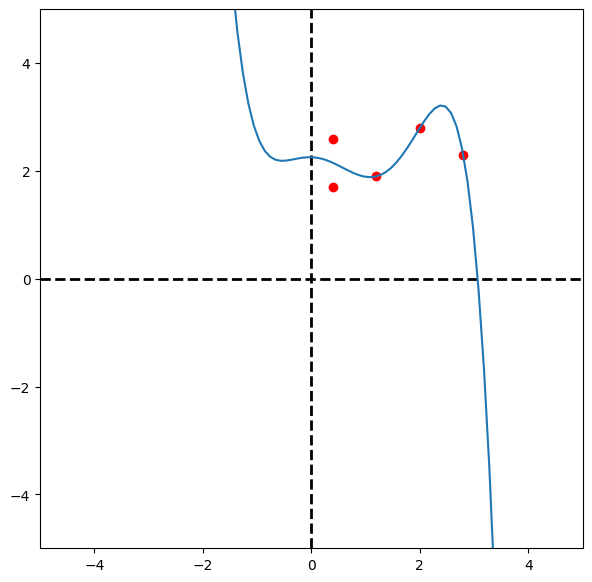

In [105]:
SSD=polyRegression(original_X,Y,degree)